In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
df = pd.read_csv('C:/Users/rania/Downloads/titanic-passengers.csv', encoding= "ISO-8859-1", sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0})   #convert survived variable into numerical
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
x = df[['PassengerId']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.65


<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>

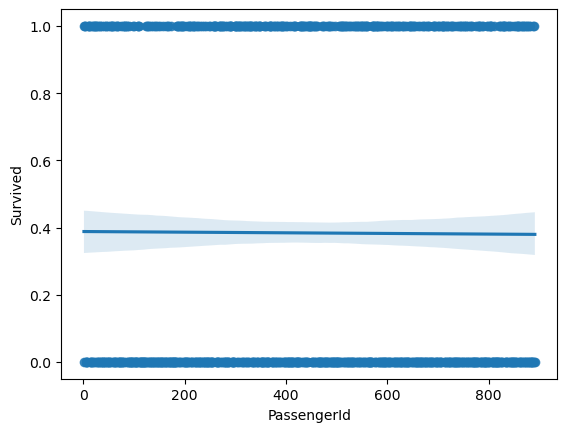

In [4]:
sns.regplot(x='PassengerId',y='Survived', data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

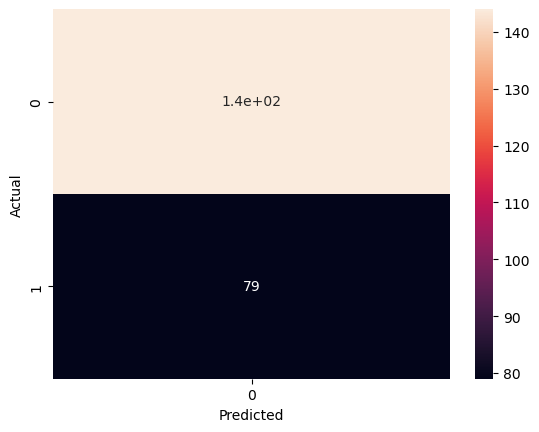

In [5]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

ROC curve
Une courbe ROC (Receiver Operating Characteristic) est un graphique qui montre les performances d'un modèle de classification à tous les seuils de classification. Cette courbe représente deux paramètres:

Taux de vrais positifs (TP)
Taux de faux positifs  (FP)

AUC signifie "Area under the ROC Curve"" (aire sous la courbe ROC). L'AUC est comprise entre 0 et 1. Un modèle dont les prédictions sont totalement fausses a un AUC de 0,0. Un modèle dont les prédictions sont correctes a un AUC de 1,0.

In [6]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning that the classifier either predicts a random class or a constant class for all the data points.

C:\Users\rania\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rania\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


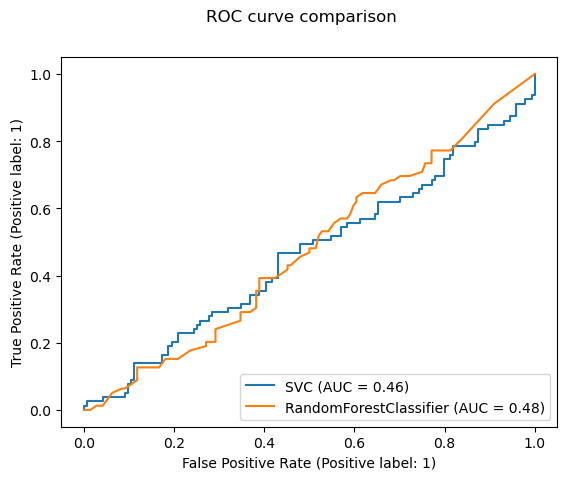

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

x = df[['PassengerId']]
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=0)

svc = SVC(random_state=0)
svc.fit(x_train, y_train)
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)

svc_disp = plot_roc_curve(svc, x_test, y_test)
rfc_disp = plot_roc_curve(rfc, x_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

Concernant l'exemple de ROC, c'est un code que j'ai trouvé sur internet et je ne suis pas sure si c'est correct ou pas.